# Estudio Permutation Importance
¿Qué variables tienen mayor impacto en nuestras predicciones?

Permutation importance nos va a enseñar si nuestro modelo depende en alguna variable en concreto, y cuánto depende en ella.

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt 

%matplotlib inline 

data = pd.read_csv('SerieTotal2016_ext_top100.csv')
data.head()

,element_key,latitude,longitude,timestamp,paid_parking_area,day_year,occupation_perc,prcp,tmax,tmin,...,poi,baseball,tennis,basket,soccer,event,no2,co,pm2_5,o3
0,1018,47.610756,-122.341899,2016-01-02 08:00:00,Belltown,2,0.00,0.0,5.56,-3.89,...,1,0,0,0,0,0,71.001333,1030.5,19.875,83.0
1,1018,47.610756,-122.341899,2016-01-02 09:00:00,Belltown,2,3.70,0.0,5.56,-3.89,...,1,0,0,0,0,0,71.001333,1030.5,19.875,83.0
2,1018,47.610756,-122.341899,2016-01-02 10:00:00,Belltown,2,18.52,0.0,5.56,-3.89,...,1,0,0,0,0,0,71.001333,1030.5,19.875,83.0
3,1018,47.610756,-122.341899,2016-01-02 11:00:00,Belltown,2,14.81,0.0,5.56,-3.89,...,1,0,0,0,0,0,71.001333,1030.5,19.875,83.0
4,1018,47.610756,-122.341899,2016-01-02 12:00:00,Belltown,2,7.41,0.0,5.56,-3.89,...,1,0,0,0,0,0,71.001333,1030.5,19.875,83.0


In [2]:
data.describe()

,element_key,latitude,longitude,day_year,occupation_perc,prcp,tmax,tmin,air_temp,road_temp,poi,baseball,tennis,basket,soccer,event,no2,co,pm2_5,o3
count,363744.000000,363744.000000,363744.000000,363744.000000,363744.000000,363744.000000,363744.000000,363744.000000,363744.000000,363744.000000,363744.000000,363744.000000,363744.000000,363744.000000,363744.0,363744.0,363744.000000,363744.000000,363744.000000,363744.000000
mean,41979.668481,47.629584,-122.337119,183.394563,28.010158,0.127522,17.147424,8.735752,14.707501,18.390786,0.499835,0.009996,0.009996,0.009996,0.0,0.0,56.645272,512.568059,5.630918,67.179701
std,27501.352417,0.024841,0.021419,105.015401,16.759651,0.255853,7.057592,4.538997,6.516853,9.494084,0.500001,0.099479,0.099479,0.099479,0.0,0.0,14.797166,194.778756,2.953534,16.314317
min,1018.000000,47.594155,-122.386288,2.000000,0.000000,0.000000,0.560000,-5.000000,-2.020000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,25.756000,229.000000,1.763158,10.000000
25%,16942.000000,47.613412,-122.346256,92.000000,15.620000,0.000000,12.220000,5.560000,9.640000,10.890000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,46.812000,400.750000,3.728571,56.000000
50%,35845.000000,47.620221,-122.333643,182.000000,27.270000,0.000000,17.220000,9.440000,14.400000,17.280000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,55.460000,458.000000,4.953333,67.600000
75%,69184.750000,47.659092,-122.319331,274.000000,39.130000,0.150000,22.220000,12.220000,19.330000,25.210000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,66.301333,572.500000,6.529412,77.000000
max,94602.000000,47.680744,-122.312603,366.000000,100.000000,1.750000,35.000000,20.560000,47.950000,47.950000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,107.473333,1431.250000,21.306250,116.000000


### Propuesta

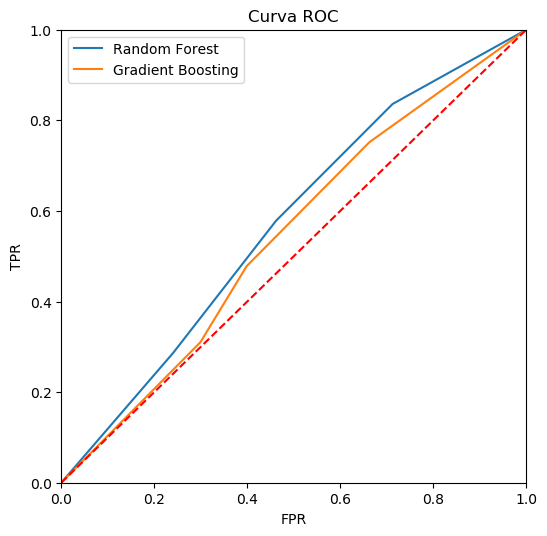

In [16]:
data = pd.read_csv('SerieTotal2016_ext_top100.csv')
data['occupation_perc'] = pd.qcut(x=data['occupation_perc'], q=4, labels=False)

y = (data['occupation_perc'])  

data['latitude'] = pd.qcut(x=data['latitude'], q=6, labels=False)
data['longitude'] = pd.qcut(x=data['longitude'], q=6, labels=False)
data = pd.get_dummies(data=data, columns=['latitude', 'longitude'])


data = data.drop('day_year', axis=1)
data = data.drop('element_key', axis=1)

feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.float64, np.uint8]] # añado un dtype más
X = data[feature_names]
X = X.drop('occupation_perc', axis=1)



train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
model_rf = RandomForestClassifier(random_state=0, n_estimators=75).fit(train_X, train_y)
model_gb = GradientBoostingClassifier(random_state=0, n_estimators=75).fit(train_X, train_y)


fpr_rf, tpr_rf, thresholds_rf = roc_curve(val_y, model_rf.predict(val_X), pos_label=2)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(val_y, model_gb.predict(val_X), pos_label=2)

random = np.linspace(0,1,num=len(fpr))
plt.figure(figsize=(6,6), dpi=100)
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot(fpr_gb, tpr_gb, label="Gradient Boosting")
plt.plot(random, random, color='red', linestyle='dashed')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curva ROC")
plt.legend()


In [17]:
auc(fpr_rf, tpr_rf)

0.5713330639267941

In [18]:
auc(fpr_gb, tpr_gb)

0.5434064728555347

In [55]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model_rf, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.0412 ± 0.0027,road_temp
0.0200 ± 0.0013,air_temp
0.0179 ± 0.0007,poi
0.0175 ± 0.0006,longitude_0
0.0125 ± 0.0011,longitude_2
0.0107 ± 0.0007,latitude_5
0.0103 ± 0.0009,latitude_1
0.0095 ± 0.0016,longitude_1
0.0065 ± 0.0021,tmax
0.0050 ± 0.0004,latitude_0


In [57]:
perm2 = PermutationImportance(model_gb, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm2, feature_names = val_X.columns.tolist())

Weight,Feature
0.0656 ± 0.0025,road_temp
0.0337 ± 0.0024,tmax
0.0239 ± 0.0011,poi
0.0224 ± 0.0015,latitude_1
0.0192 ± 0.0009,longitude_0
0.0180 ± 0.0017,longitude_2
0.0167 ± 0.0014,longitude_1
0.0116 ± 0.0008,longitude_5
0.0114 ± 0.0007,latitude_0
0.0106 ± 0.0008,latitude_5


### Conclusión

* Road_temp y air_temp tienen más importancia en la predicción
* Parece que el modelo es muy variable a la localización geográfica (EK)
* El RandomForest que predice la importancia tiene un AUC muy cercano a 0.5 (*random classification*)